In [7]:
# import findspark
# findspark.init()

# from pyspark.sql.functions import *
# from pyspark.sql.types import MapType,StringType

import pandas

In [9]:
# spark = SparkSession.builder.appName('telegramCategorizer').config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:4.2.7").getOrCreate()
# bucket_name="telegram-history-bucket-inst-1"
# data_source="processed-messages.json"
# path=f"file://./{data_source}"

# df = spark.read.option("multiline", "true").option("encoding", "UTF-8").json(path)
df = pandas.read_json('./processed-messages.json')
df.printSchema()

AttributeError: 'DataFrame' object has no attribute 'printSchema'

In [ ]:
df = df.select("id", "type", "from", "text", "media_type", "photo")

In [ ]:
mapped_df = df.na.fill("")

def get_media_mapping(media_type):
    if media_type == "sticker" :return 1
    elif media_type == "annimation" : return 2
    elif media_type == "video_message": return 3
    if media_type == "voice_message" : return 4
    elif media_type == "video_file" : return 4
    else: return 1000

def get_message_class(media_type, photo_attached):
    """returns class identifier of the message
    0 - plain message, only text
    1 - sticker
    2 - annimation
    3 - video_message
    4 - voice_message
    5 - video_file
    6 - photo
    1000 - other
    """
    if bool(photo_attached): return 6
    if not bool(media_type): return 0
    return get_media_mapping(media_type)

def owns_by(user, text):
    
    """returns class identifier of the message
    0 - mention java, spring, typescript, мальчики, орунькаю
    1 - rust, аніме, ахахахаха, сед, кричу
    2 - docker, kuber, microservice, докер, кубер, eбо
    """
    java = ["java", "spring", "typescript", "мальчики", "орунькаю"]
    rust = ["rust", "раст" "аніме", "аха", "сед", "кричу", "ex"]
    docker = ["docker", "kuber", "microservice", "докер", "кубер", "eбо"]
    if any(substring in text for substring in java): return 0
    if any(substring in text for substring in rust): return 1
    if any(substring in text for substring in docker): return 2
    
    if 'Gri' in user: return 0
    if 'Ши' in user: return 1
    if 'Ni' in user: return 2
    

mapped_df=mapped_df.rdd.map(lambda x: 
    (x.id,x.type, owns_by(x["from"], x.text), x.text, get_message_class(x.media_type, x.photo)) 
    ).toDF(["id", "type", "owns_by", "text", "message_class"]).na.fill(0)
mapped_df.show()

+----------+-------+-------+--------------------+-------------+
|        id|   type|owns_by|                text|message_class|
+----------+-------+-------+--------------------+-------------+
|-999839085|service|      0|                    |            0|
|-999839084|message|      0|Сорян у меня сел ...|            0|
|-999839083|message|      0|Всем пасибо за ва...|            0|
|-999839082|message|      0|      Спокойной ночи|            0|
|-999839076|message|      1|              Хорошо|            0|
|-999839075|message|      1|         На добраніч|            0|
|-999839074|message|      2|Прикольно поговор...|            0|
|-999839073|message|      0|                    |            1|
|-999839059|message|      1|                    |            6|
|-999839058|message|      1|це до того, що ми...|            0|
|-999839057|message|      0| Ооооо. Это грустно(|            0|
|-999839045|message|      1|[{"type":"mention...|            6|
|-999839044|message|      1|[{"type":"me

In [ ]:
import sys
!{sys.executable} -m pip install git+https://github.com/Desklop/Uk_Stemmer 
!{sys.executable} -m pip install nltk==3.6.5
!{sys.executable} -m pip install regex==2022.10.31

  Cloning https://github.com/Desklop/Uk_Stemmer to /tmp/pip-req-build-ktzrzn91
  Running command git clone --filter=blob:none --quiet https://github.com/Desklop/Uk_Stemmer /tmp/pip-req-build-ktzrzn91
  Resolved https://github.com/Desklop/Uk_Stemmer to commit a700ae1bd9b69ad84d311d089e8bc95ab7fab44d
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import re
import random
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from uk_stemmer import UkStemmer

In [ ]:
import matplotlib.pyplot as plt
def data_class_display(dataframe,class_column,expl_lables):
    """ data_class_display - shows the class shares in the dateframe. 
    
    Keyword arguments:
    dataframe -- dateframe with classes to display
    class_column -- column with class labels
    expl_lables -- dictionary for explaining class labels    
    
    """
    
    data=dataframe[class_column].value_counts()
    sum_value=data.sum()
    data=data.T   
    
    labels=[]
    fracs=[]
    explode=[]
    
    for index,value in data.iteritems():
        labels.append('{0}.{1} - {2:.2f} % ({3} екземплярів)'.format(index,expl_lables[index],(value/sum_value*100),value))
        fracs.append(value)
        explode.append(0.1)
        
    fig, axs = plt.subplots()
    axs.pie(x=fracs, autopct='%1.2f%%',radius=1.0,wedgeprops=dict(width=0.7, edgecolor='w'))
    plt.legend(fracs, labels=labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
    axs.set_title("Класи")
    plt.show()

/tmp/ipykernel_5463/3465205534.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fracs, labels=labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)


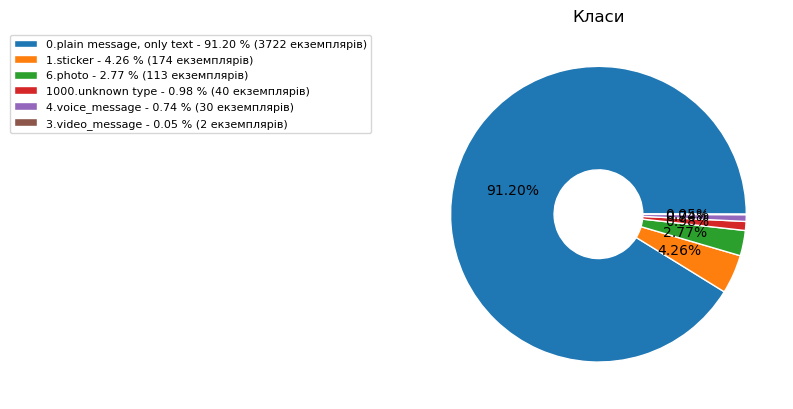

/opt/conda/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0, flags=flags)


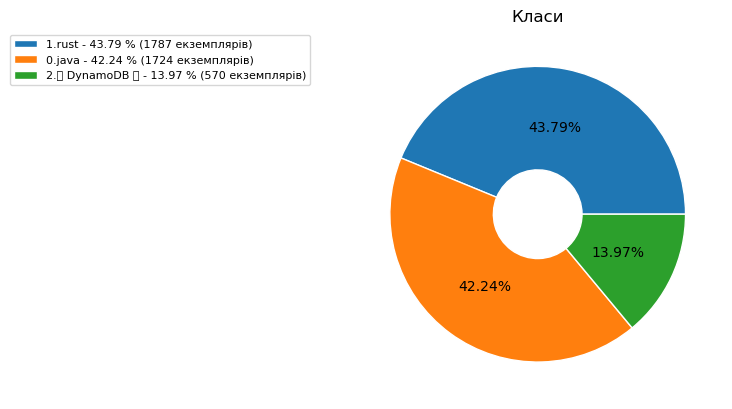

In [ ]:
# get pandas from spark, cause sklearn work only with pandas
message_classes_labels = {
    0: "plain message, only text", 
    1: "sticker",
    2: "annimation",
    3: "video_message", 
    4: "voice_message",
    5: "video_file",
    6:"photo",
    1000: "unknown type"}

owns_by_labels = {
    0: "java", 
    1: "rust",
    2: "💩 DynamoDB 💩"}

pandas_df = mapped_df.toPandas()
data_class_display(dataframe=pandas_df,class_column='message_class',expl_lables=message_classes_labels)

data_class_display(dataframe=pandas_df,class_column='owns_by',expl_lables=owns_by_labels)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1 - grams
ua_stemmer: True
Кількість символів:  132193
Кількість токенів:  14194
Кількість унікальних токенів:  4319
Найбільш уживані токени:  [(('это',), 197), (('мен',), 174), (('все',), 137), (('буд',), 101), (('прост',), 98), (('теб',), 83), (('мне',), 82), (('за',), 78), (('та',), 73), (('вы',), 70), (('можн',), 68), (('вот',), 64), (('он',), 64), (('раст',), 62), (('ал',), 62), (('із',), 61), (('ещ',), 60), (('хоч',), 59), (('есл',), 58), (('ти',), 56)]


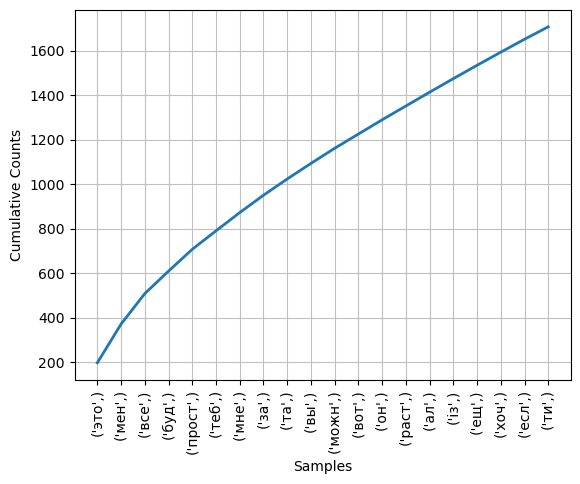

3 - grams
ua_stemmer: True
Кількість символів:  132193
Кількість токенів:  14192
Кількість унікальних токенів:  14108
Найбільш уживані токени:  [(('бе', 'бе', 'бе'), 7), (('мотивац', 'слабак', 'прост'), 4), (('слабак', 'прост', 'ебош'), 4), (('молодец', 'возьм', 'полк'), 3), (('скоріш', 'за', 'все'), 3), (('во', 'во', 'вов'), 3), (('всем', 'спокойн', 'ноч'), 3), (('зараз', 'ід', 'турнік'), 2), (('хорош', 'тапк', 'снял'), 2), (('мен', 'к', 'вам'), 2), (('ладн', 'хорош', 'теб'), 2), (('хорош', 'теб', 'понял'), 2), (('ал', 'пот', 'треб'), 2), (('пот', 'треб', 'буд'), 2), (('тут', 'щойн', 'прийш'), 2), (('щойн', 'прийш', 'із'), 2), (('прийш', 'із', 'турнік'), 2), (('вон', 'класн', 'мен'), 2), (('песн', 'владимир', 'высоцк'), 2), (('владимир', 'высоцк', 'ден'), 2)]


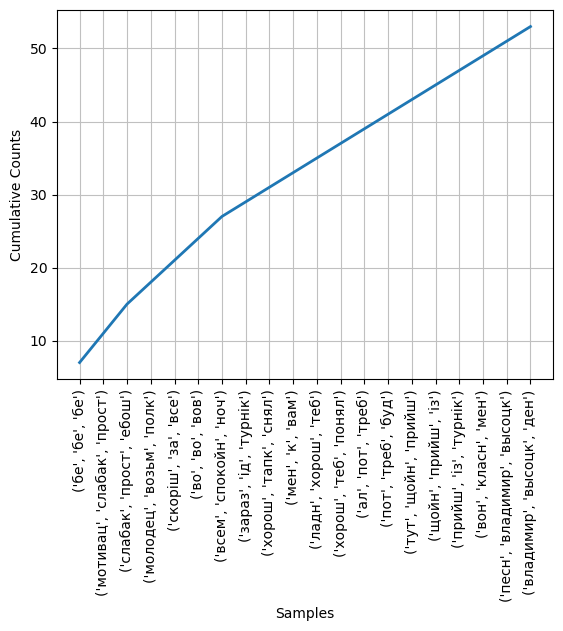

In [ ]:
import nltk
nltk.download('punkt')

def ua_tokenizer(text,ua_stemmer=True,stop_words=[]):
    """ Tokenizer for Ukrainian language, returns only alphabetic tokens. 
    
    Keyword arguments:
    text -- text for tokenize 
    ua_stemmer -- if True use UkrainianStemmer for stemming words (default True)
    stop_words -- list of stop words (default [])
        
    """
    tokenized_list=[]
    text=re.sub(r"""['’"`�]""", '', text)
    text=re.sub(r"""[A-z]""", ' ', text)
    text=re.sub(r"""([0-9])([\u0400-\u04FF]|[A-z])""", ' ', text)
    text=re.sub(r"""([\u0400-\u04FF]|[A-z])([0-9])""", ' ', text)
    text=re.sub(r"""[\-.,:+*/_]""", ' ', text)
    for word in nltk.word_tokenize(text): 
        if word.isalpha():
            word=word.lower() 
            if ua_stemmer is True:      
                word=UkStemmer().stem_word(word)
            if word not in stop_words:
                tokenized_list.append(word) 
    return tokenized_list

stop_words = ["я", "ты", "мы", "а", "і", "у", "там", "як", "как", "то", "не", "в", "что", "ну", "це", "що", "там", "для", "с", "да", "но", "по", "на", "и", "так"]

def ngrams_info(series,n=1,most_common=20,ua_stemmer=True,stop_words=stop_words):
    """ ngrams_info - Show detailed information about string pandas.Series column. 
    
    Keyword arguments:
    series -- pandas.Series object
    most_common -- show most common words(default 50)
    ua_stemmer -- if True use UkrainianStemmer for stemming words (default True)
    stop_words -- list of stop words (default [])
        
    """
    print (n,'- grams')
    print ('ua_stemmer:',ua_stemmer)
    words=series.str.cat(sep=' ')
    print ('Кількість символів: ',len(words))
    words=nltk.ngrams(ua_tokenizer(words,ua_stemmer=ua_stemmer,stop_words=stop_words),n)
    words=nltk.FreqDist(words)
    print ('Кількість токенів: ',words.N())
    print ('Кількість унікальних токенів: ',words.B())
    print ('Найбільш уживані токени: ',words.most_common(most_common))
    words.plot (most_common, cumulative = True)

for n in (1,3):    
    ngrams_info(pandas_df[['text']],n=n)

In [ ]:
def bag_of_words(document_tokens,word_features):
        """ Return the dict of bag_of_words. 

        Keyword arguments:
        document_tokens -- list of tokens
        word_features -- list of features

        """
        
        features={}
        for word in word_features:
            
            features['contains({})'.format(word)]=(word[0] in document_tokens)
        
        return features


def nltk_classifiers(dataframe,X_column,y_column,classifier=nltk.NaiveBayesClassifier,n=1,stop_words=stop_words,ua_stemmer=True,most_common=1000): 
    
    
    words=dataframe[X_column].str.cat(sep=' ')
    words=nltk.ngrams(ua_tokenizer(words,ua_stemmer=ua_stemmer,stop_words=stop_words),n=n)
    words=nltk.FreqDist(words)
    word_features=words.most_common(most_common)
    word_features=[words[0] for words in word_features]
    
    
    labeled_featuresets=[]
    for _,row in dataframe.iterrows():
        
        row[X_column]=nltk.ngrams(ua_tokenizer(row[X_column],ua_stemmer=ua_stemmer,stop_words=stop_words),n=n)
        row[X_column]=[words[0] for words in nltk.FreqDist(row[X_column])]        
        labeled_featuresets.append((bag_of_words(row[X_column],word_features=word_features), row[y_column]))  
        
    
    train_set,test_set,_,_=train_test_split(labeled_featuresets,dataframe[y_column],stratify=dataframe[y_column],test_size=0.33)
    
    
    
    if classifier==nltk.MaxentClassifier:
        classifier=classifier.train(train_set, max_iter=5)
    else:
        classifier=classifier.train(train_set)         
    accuracy_train=nltk.classify.accuracy(classifier, train_set)
    accuracy=nltk.classify.accuracy(classifier, test_set)
    print('Точність класифікатора на навчальних даних:',accuracy_train)
    print('Точність класифікатора на тестових даних:',accuracy)
    y_true=[]
    y_pred=[]
    for test in test_set:
        y_true.append(test[1])
        y_pred.append(classifier.classify(test[0]))
    confmat=nltk.ConfusionMatrix(y_pred,y_true)
    print(confmat)
    return classifier   


classifiers=[nltk.NaiveBayesClassifier,nltk.MaxentClassifier,nltk.DecisionTreeClassifier]
y_column = 'owns_by'
for classifier in classifiers:
    for n in (1,3):
        print ('Класифікатор -',classifier)
        print ('Порядок n -',n)           
        print ('Класифікатор за колонкою -',y_column) 
        model=nltk_classifiers(pandas_df,X_column='text',y_column=y_column,classifier=classifier, n=n)
        if classifier==nltk.NaiveBayesClassifier:
            print ('Найважливіші токени для класифікації за колонкою -',y_column)
            model.show_most_informative_features(10)     
                   

Класифікатор - <class 'nltk.classify.naivebayes.NaiveBayesClassifier'>
Порядок n - 1
Класифікатор за колонкою - owns_by
Точність класифікатора на навчальних даних: 0.7457937088514996
Точність класифікатора на тестових даних: 0.6555308092056422
  |   0   1   2 |
--+-------------+
0 |<479>233 102 |
1 |  44<338> 20 |
2 |  46  19 <66>|
--+-------------+
(row = reference; col = test)

Найважливіші токени для класифікації за колонкою - owns_by
Most Informative Features
       contains(('ти',)) = True                1 : 0      =     23.5 : 1.0
      contains(('паш',)) = True                2 : 1      =     20.6 : 1.0
    contains(('работ',)) = True                2 : 1      =     19.8 : 1.0
      contains(('пок',)) = True                2 : 0      =     19.1 : 1.0
       contains(('уж',)) = True                2 : 1      =     18.1 : 1.0
    contains(('будет',)) = True                2 : 1      =     17.4 : 1.0
      contains(('пис',)) = True                2 : 0      =     17.1 : 1.0
      c